In [2]:
import os
import tarfile
import requests
from six.moves import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
def fetch_housing_data(url, dest, fname="housing.tgz"):
    if not os.path.exists(dest):
        os.makedirs(dest)
    dest_path = os.path.join(dest, fname)
    urllib.request.urlretrieve(url, dest_path)
    with tarfile.open(dest_path) as fp:
        fp.extractall(dest)
        fp.close()



def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
    

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/sachinyadav3496/handson-ml2/master/"
HOUSING_PATH = "datasets/housing"
URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
DEST = os.path.join(os.getcwd(), "datasets/housing")
    
fetch_housing_data(URL, DEST)

housing = load_housing_data(DEST)
    

In [3]:
housing = pd.read_csv("C:\\Users\\GM\\Desktop\\Data Science\\Machine Learning Projects\\Datasets\\housing\\housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


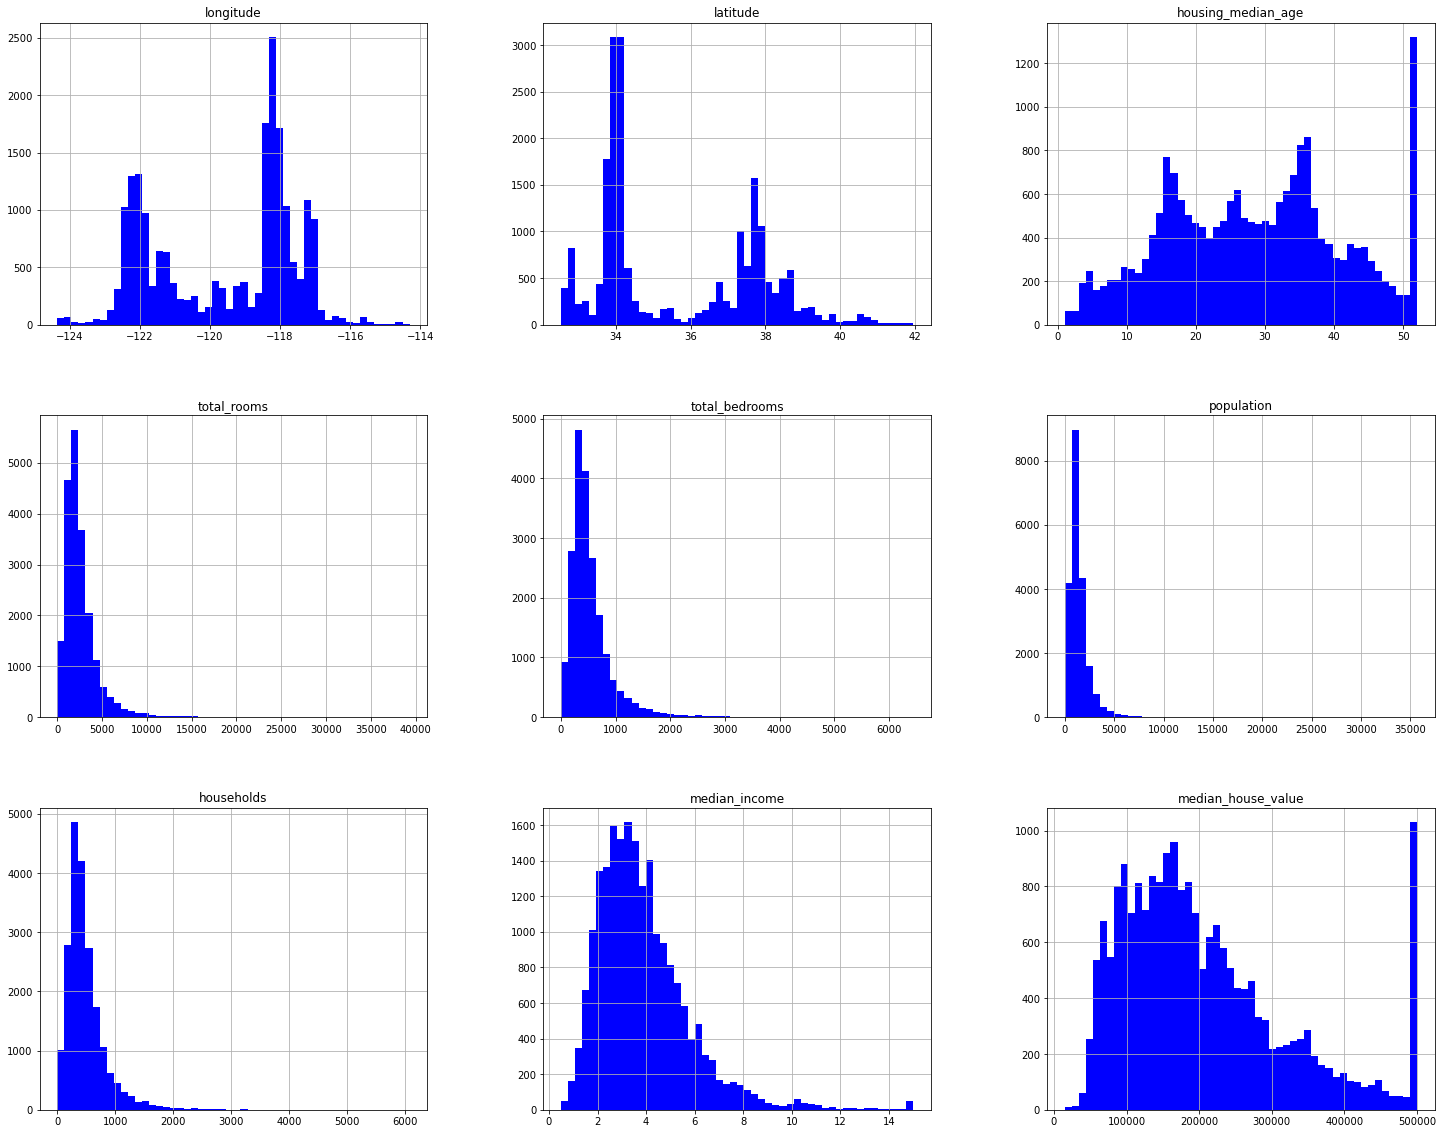

In [25]:
%matplotlib inline
housing.hist(bins=50, figsize=(25,20), color='b')
plt.show()

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing["income_cat"] = pd.cut(housing["median_income"],bins = [0., 1.5, 3.0, 4.5, 6., np.inf],labels = [1, 2, 3, 4, 5])

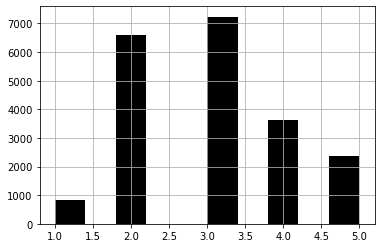

In [5]:
housing["income_cat"].hist(color='k')
plt.show()

In [33]:
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3


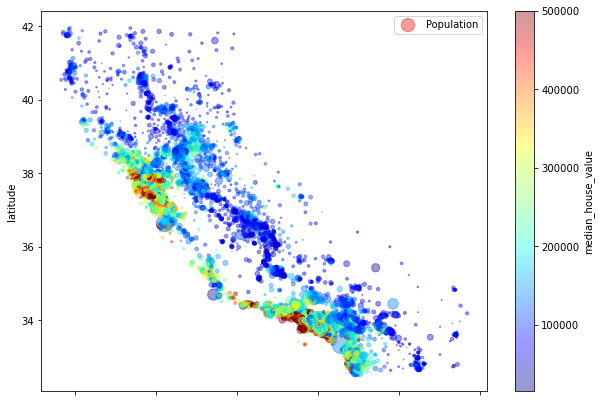

In [12]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='Population', 
             figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()

In [34]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [39]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

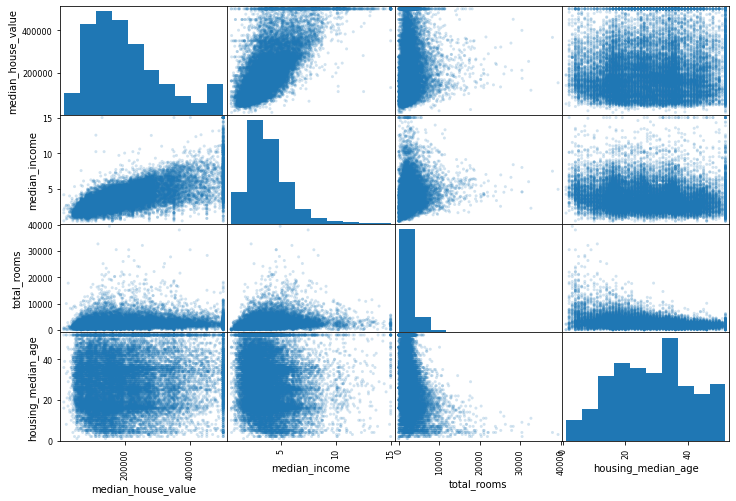

In [56]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.2, marker='.')
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

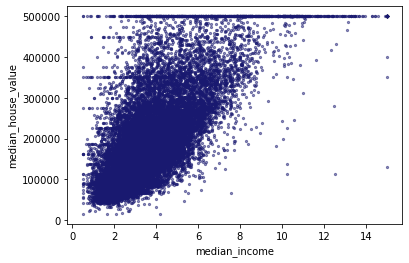

In [10]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, marker='.', color='midnightblue')

In [64]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [6]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [7]:
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

In [8]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    ixs = np.arange(X.shape[0])
    
    if random_state:
        np.random.seed(random_state)
    np.random.shuffle(ixs)
    
    t_size = int(X.shape[0]*test_size)
    test_ixs = ixs[:t_size]
    train_ixs = ixs[t_size:]
    X_train = X.iloc[train_ixs]
    X_test = X.iloc[test_ixs]
    y_train = y.iloc[train_ixs]
    y_test = y.iloc[test_ixs]
    return X_train, X_test, y_train, y_test
        

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
housing_train = X_train
housing_labels = y_train

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy = 'median')
housing_num = housing_train.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.34000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53130000e+00,
        3.00000000e+00,  5.23745425e+00,  2.02900143e-01,  2.82184999e+00])

In [14]:
housing_num.median().values

C:\Users\GM\AppData\Local\Temp\ipykernel_24964\3605723347.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-1.18500000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.34000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53130000e+00,
        5.23745425e+00,  2.02900143e-01,  2.82184999e+00])

In [15]:
Xs = imputer.transform(housing_num)

In [16]:
housing_tr = pd.DataFrame(Xs, columns=housing_num.columns)

In [17]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-118.13,34.19,48.0,2539.0,425.0,930.0,364.0,4.7269,4.0,6.975275,0.167389,2.554945
1,-121.84,39.74,43.0,2976.0,599.0,1181.0,560.0,2.2621,2.0,5.314286,0.201277,2.108929
2,-121.15,38.80,20.0,2104.0,370.0,745.0,314.0,4.1685,3.0,6.700637,0.175856,2.372611
3,-117.08,34.96,28.0,1777.0,307.0,721.0,259.0,3.6343,3.0,6.861004,0.172763,2.783784
4,-119.50,34.35,39.0,308.0,38.0,59.0,21.0,11.7794,5.0,14.666667,0.123377,2.809524
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.25,34.23,34.0,2421.0,475.0,1232.0,454.0,4.6852,4.0,5.332599,0.196200,2.713656
16508,-118.10,33.85,36.0,956.0,159.0,416.0,157.0,4.6429,4.0,6.089172,0.166318,2.649682
16509,-121.76,37.30,6.0,3526.0,559.0,1378.0,491.0,6.1463,5.0,7.181263,0.158537,2.806517
16510,-121.95,37.35,36.0,832.0,211.0,545.0,211.0,3.2813,3.0,3.943128,0.253606,2.582938


In [18]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   income_cat                16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [39]:
housing_cat = housing_train[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
6560,INLAND
1071,INLAND
11749,INLAND
13991,INLAND
17310,NEAR OCEAN
17392,<1H OCEAN
8391,<1H OCEAN
7417,<1H OCEAN
16167,NEAR BAY
6345,INLAND


In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
ordinal_encoder = OrdinalEncoder()

In [33]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [0.],
       [0.],
       [0.],
       [3.],
       [1.]])

In [34]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]